RFM

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt


df = pd.read_excel(r"C:\Users\Hazeeb\OneDrive\Desktop\inter\New folder\online_retail_II (1)_Updated.xlsx")
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
99994,544795,22716,CARD CIRCUS PARADE,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom
99995,544795,22815,CARD PSYCHEDELIC APPLES,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom
99996,544795,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom
99997,544795,22035,VINTAGE CARAVAN GREETING CARD,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom


In [2]:
df.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

In [3]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,99999.000000,99999,99999.000000,65084.000000
mean,8.892949,2011-01-07 05:17:00.130201344,5.396653,15350.988415
min,-74215.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,1.000000,2010-12-10 15:17:00,1.250000,13869.000000
50%,3.000000,2011-01-09 15:13:00,2.510000,15311.000000
75%,8.000000,2011-01-28 13:54:00,4.250000,16997.000000
max,74215.000000,2011-02-23 13:21:00,16888.020000,18283.000000
std,336.564383,NaN,120.891603,1769.766795


In [4]:
df.isnull().sum()

Invoice            0
StockCode          0
Description      299
Quantity           0
InvoiceDate        0
Price              0
Customer ID    34915
Country            0
dtype: int64

In [5]:
df['Customer ID'] = df['Customer ID'].dropna()
df['Description'] = df['Description'].fillna("unknown")
df.isnull().sum()

Invoice            0
StockCode          0
Description        0
Quantity           0
InvoiceDate        0
Price              0
Customer ID    34915
Country            0
dtype: int64

In [49]:
df.tail()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
99994,544795,22716,CARD CIRCUS PARADE,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom
99995,544795,22815,CARD PSYCHEDELIC APPLES,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom
99996,544795,22028,PENNY FARTHING BIRTHDAY CARD,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom
99997,544795,22035,VINTAGE CARAVAN GREETING CARD,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom
99998,544795,22024,RAINY LADIES BIRTHDAY CARD,12,2011-02-23 13:21:00,0.42,15858.0,United Kingdom


TASK 2

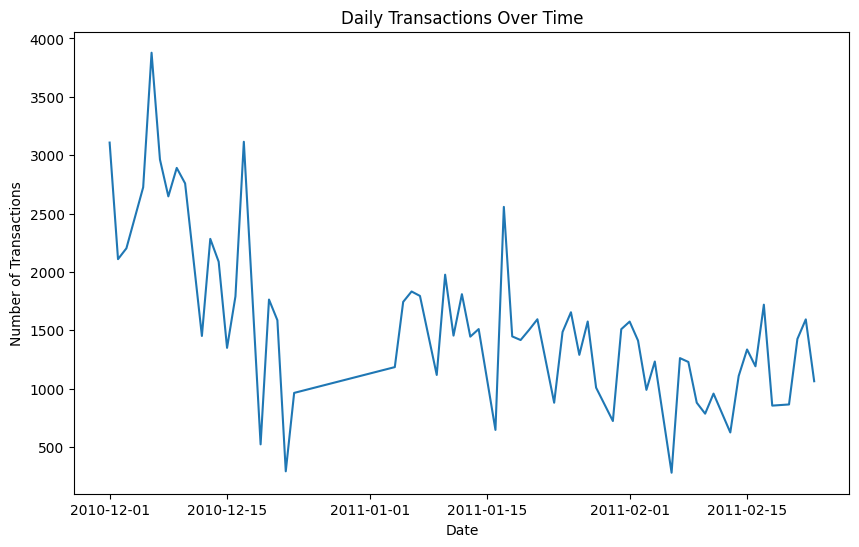

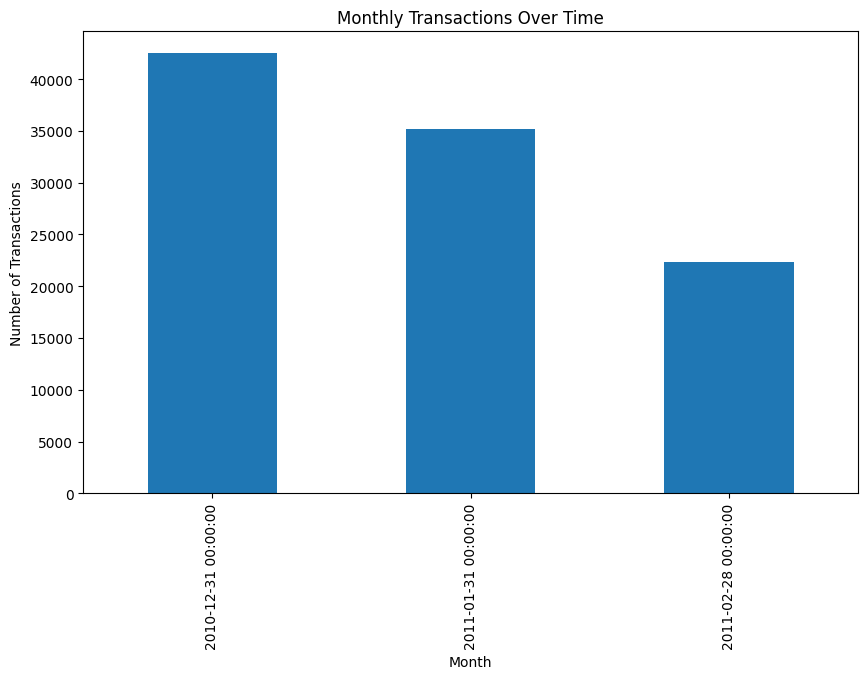

In [13]:
import matplotlib.pyplot as plt
df['Date'] = df['InvoiceDate'].dt.date

daily_transactions = df.groupby('Date').size()
daily_transactions.plot(kind='line', figsize=(10, 6))
plt.title('Daily Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()


monthly_transactions = df.resample('M', on='InvoiceDate').size()
monthly_transactions.plot(kind='bar', figsize=(10, 6))
plt.title('Monthly Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

In [18]:
df['TotalPrice'] = df['Quantity'] * df['Price']
total_revenue = df['TotalPrice'].sum()
average_order_value = total_revenue / df['Invoice'].nunique()
total_customers = df['Customer ID'].nunique()

print("Total Revenue:", total_revenue)
print("Average Order Value:", average_order_value)
print("Total Number of Customers:", total_customers)

Total Revenue: 1727703.3199999998
Average Order Value: 371.07030068728517
Total Number of Customers: 1663


In [14]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products:")
print(top_products)


Top Selling Products:
Description
WHITE HANGING HEART T-LIGHT HOLDER    10498
WORLD WAR 2 GLIDERS ASSTD DESIGNS     10157
PACK OF 72 RETROSPOT CAKE CASES        9176
JUMBO BAG RED RETROSPOT                7413
unknown                                7082
SMALL POPCORN HOLDER                   7002
GROW A FLYTRAP OR SUNFLOWER IN TIN     6748
PACK OF 12 LONDON TISSUES              5821
ASSORTED COLOUR BIRD ORNAMENT          5573
HEART OF WICKER SMALL                  5566
Name: Quantity, dtype: int64


In [15]:
top_categories = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Selling Product Categories:")
print(top_categories)

Top Selling Product Categories:
Description
WHITE HANGING HEART T-LIGHT HOLDER    10498
WORLD WAR 2 GLIDERS ASSTD DESIGNS     10157
PACK OF 72 RETROSPOT CAKE CASES        9176
JUMBO BAG RED RETROSPOT                7413
unknown                                7082
SMALL POPCORN HOLDER                   7002
GROW A FLYTRAP OR SUNFLOWER IN TIN     6748
PACK OF 12 LONDON TISSUES              5821
ASSORTED COLOUR BIRD ORNAMENT          5573
HEART OF WICKER SMALL                  5566
Name: Quantity, dtype: int64


In [16]:
# Explore customer demographics by country
customer_demographics = df.groupby('Country')['Customer ID'].nunique()
print("Customer Demographics by Country:")
print(customer_demographics)

Customer Demographics by Country:
Country
Australia                  8
Austria                    4
Bahrain                    0
Belgium                    9
Channel Islands            3
Cyprus                     5
Denmark                    2
EIRE                       3
Finland                    2
France                    36
Germany                   42
Greece                     1
Hong Kong                  0
Iceland                    1
Israel                     2
Italy                      7
Japan                      4
Lebanon                    1
Lithuania                  1
Netherlands                4
Norway                     3
Poland                     2
Portugal                   7
Singapore                  1
Spain                     12
Sweden                     3
Switzerland                4
United Arab Emirates       1
United Kingdom          1497
Name: Customer ID, dtype: int64


TASK 3

1) Recency :- when was the last time customer intracted with us

In [7]:

today_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
#today_date
today_date = pd.to_datetime(today_date)

recency = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    #'Invoice': 'nunique',  # Frequency
    #'Price': 'sum'  # Monetary
})

print(recency)



             InvoiceDate
Customer ID             
12346.0               37
12347.0               28
12348.0               30
12350.0               21
12352.0                8
...                  ...
18259.0               77
18260.0               33
18269.0               69
18277.0               30
18283.0               31

[1663 rows x 1 columns]


2) Frequency :- how many times the customer intracted with us

In [8]:
frq = df.drop_duplicates(subset="Invoice").groupby(['Customer ID'])[['Invoice']].count()
frq

,Invoice
Customer ID,
12346.0,2
12347.0,2
12348.0,2
12350.0,1
12352.0,1
...,...
18259.0,1
18260.0,3
18269.0,2


3) Monetary : amount spent by the cutomer

In [9]:
df['total_price'] = df['Price']*df["Quantity"]

mone = df.groupby(['Customer ID'])[['total_price']].sum()
mone

,total_price
Customer ID,
12346.0,0.00
12347.0,1187.18
12348.0,1120.24
12350.0,334.40
12352.0,296.50
...,...
18259.0,376.30
18260.0,769.52
18269.0,138.90


In [10]:
RFM = pd.concat([recency,frq,mone],axis=1)
RFM

,InvoiceDate,Invoice,total_price
Customer ID,,,
12346.0,37,2,0.00
12347.0,28,2,1187.18
12348.0,30,2,1120.24
12350.0,21,1,334.40
12352.0,8,1,296.50
...,...,...,...
18259.0,77,1,376.30
18260.0,33,3,769.52
18269.0,69,2,138.90


we can combine these 3 rfm

In [12]:
today_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
#today_date
today_date = pd.to_datetime(today_date)
rfm_df = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (today_date - x.max()).days,  # Recency
    'Invoice': 'nunique',  # Frequency
    'Price': 'sum'  # Monetary
}).rename(columns={
    'InvoiceDate': 'Recency',
    'Invoice': 'Frequency',
    'Price': 'Monetary'
})

# Display the RFM dataframe
print(rfm_df)

             Recency  Frequency  Monetary
Customer ID                              
12346.0           37          2      2.08
12347.0           28          2    162.76
12348.0           30          2     91.61
12350.0           21          1     65.30
12352.0            8          1     68.35
...              ...        ...       ...
18259.0           77          1     22.10
18260.0           33          3    128.81
18269.0           69          2     27.10
18277.0           30          1     12.75
18283.0           31          2    184.20

[1663 rows x 3 columns]


Normalization:
but here we don't have any common scale so we have to normalize the data

In [55]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
stds = std.fit_transform(rfm_df)

so now we import machine learning models to cluster

c:\Users\Hazeeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hazeeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hazeeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Hazeeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\

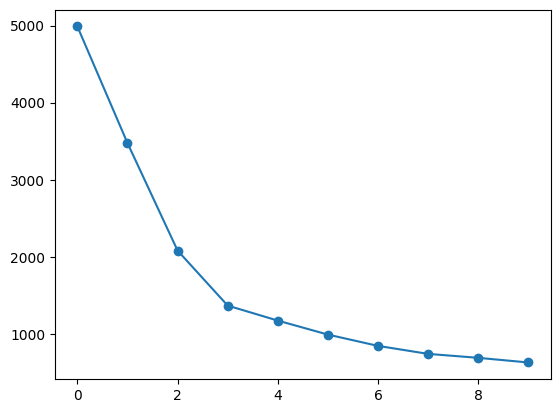

In [56]:
#if we don't know the no of clusters


from sklearn.cluster import KMeans


clus = []

for i in np.arange(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(stds)
    clus.append(kmeans.inertia_)

plt.plot(clus, marker = "o")


this method is called ellbow method

In [57]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(stds)
rfm_df["Clusters"] = (kmeans.labels_)
rfm_df

c:\Users\Hazeeb\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Recency,Frequency,Monetary,Clusters
Customer ID,,,,
12346.0,37,2,2.08,1
12347.0,28,2,162.76,1
12348.0,30,2,91.61,1
12350.0,21,1,65.30,1
12352.0,8,1,68.35,1
...,...,...,...,...
18259.0,77,1,22.10,0
18260.0,33,3,128.81,1
18269.0,69,2,27.10,0


In [58]:
# Assuming you have added a column named "Clusters" to your RFM dataframe
groups = rfm_df.groupby("Clusters")[['Recency', 'Frequency', 'Monetary']].mean()
print(groups)



            Recency  Frequency     Monetary
Clusters                                   
0         69.098039   1.359477    70.836961
1         18.552783   2.727447   146.428580
2          7.000000  28.111111  1941.732222


creating fuction to find each costmer belongs to clusters

In [59]:
def func(i):
    if i["Clusters"] == 0:
        return "avg"
    elif i["Clusters"] == 1:
        return "good"
    else:
        return "very good"

In [60]:
rfm_df["Conditions"] = rfm_df.apply(func, axis=1)
rfm_df

,Recency,Frequency,Monetary,Clusters,Conditions
Customer ID,,,,,
12346.0,37,2,2.08,1,good
12347.0,28,2,162.76,1,good
12348.0,30,2,91.61,1,good
12350.0,21,1,65.30,1,good
12352.0,8,1,68.35,1,good
...,...,...,...,...,...
18259.0,77,1,22.10,0,avg
18260.0,33,3,128.81,1,good
18269.0,69,2,27.10,0,avg


In [61]:
result = rfm_df["Conditions"].value_counts()
result

Conditions
good         1042
avg           612
very good       9
Name: count, dtype: int64

<Axes: ylabel='Conditions'>

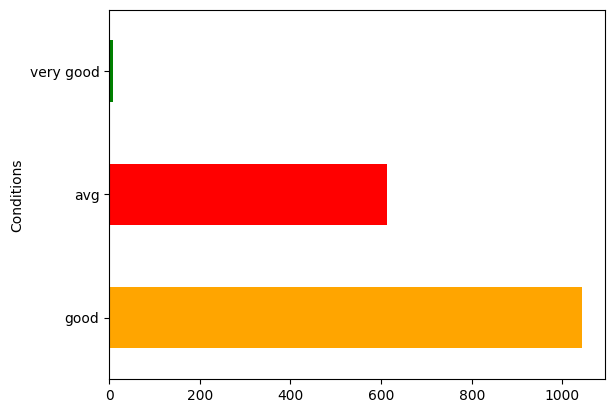

In [62]:
result.plot(kind='barh', color=["Orange","Red","Green"])